In [12]:
# This Notebook loads a dataset from memory, calculates NDBI on the result set, and plots the results. 
# NDBI = Normalized Difference Built-up Index

# NDBI = (SWIR – NIR)/(SWIR + NIR)

In [13]:
import datacube
from datacube.api.query import Query
from datacube.storage import masking

dc = datacube.Datacube()

In [14]:
query = { 
    'product' : 'LC08_scene'
    , 'time' : ('2017-07-05','2017-08-23')
    , 'latitude' : (47.7838, 49.93203)
    , 'longitude' : (-124.35999, -121.14917)
    , 'measurements' : ['swir2', 'nir', 'quality']
    , 'resolution' : (-0.0025, 0.0025)
}

In [15]:
dc.find_datasets(**query)

[Dataset <id=89d2a48b-8594-50f2-b24c-2a2282ad766d type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_049025_20170804_20170812_01_T1/metadata.yaml>,
 Dataset <id=ddbc50df-7a31-5790-8eca-8e5635e7900a type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_048026_20170728_20170810_01_T1/metadata.yaml>,
 Dataset <id=c29ba58a-238f-5408-8876-e6f7f3ae6e3d type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_047026_20170822_20170912_01_T1/metadata.yaml>,
 Dataset <id=b27142ef-6a7c-5581-bafd-d3a2aaad8968 type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_047026_20170806_20170813_01_T1/metadata.yaml>,
 Dataset <id=2c25bc23-47bf-5860-a4c9-07679967d3bc type=LC08_scene location=/data/datacube/in/landsat/LC08_L1TP_047026_20170705_20170716_01_T1/metadata.yaml>]

In [16]:
# Load the data into memory
data = dc.load(**query)

In [18]:
nir = data.nir.where(data.nir != data.nir.attrs['nodata'])
swir2 = data.swir2.where(data.swir2 != data.swir2.attrs['nodata'])

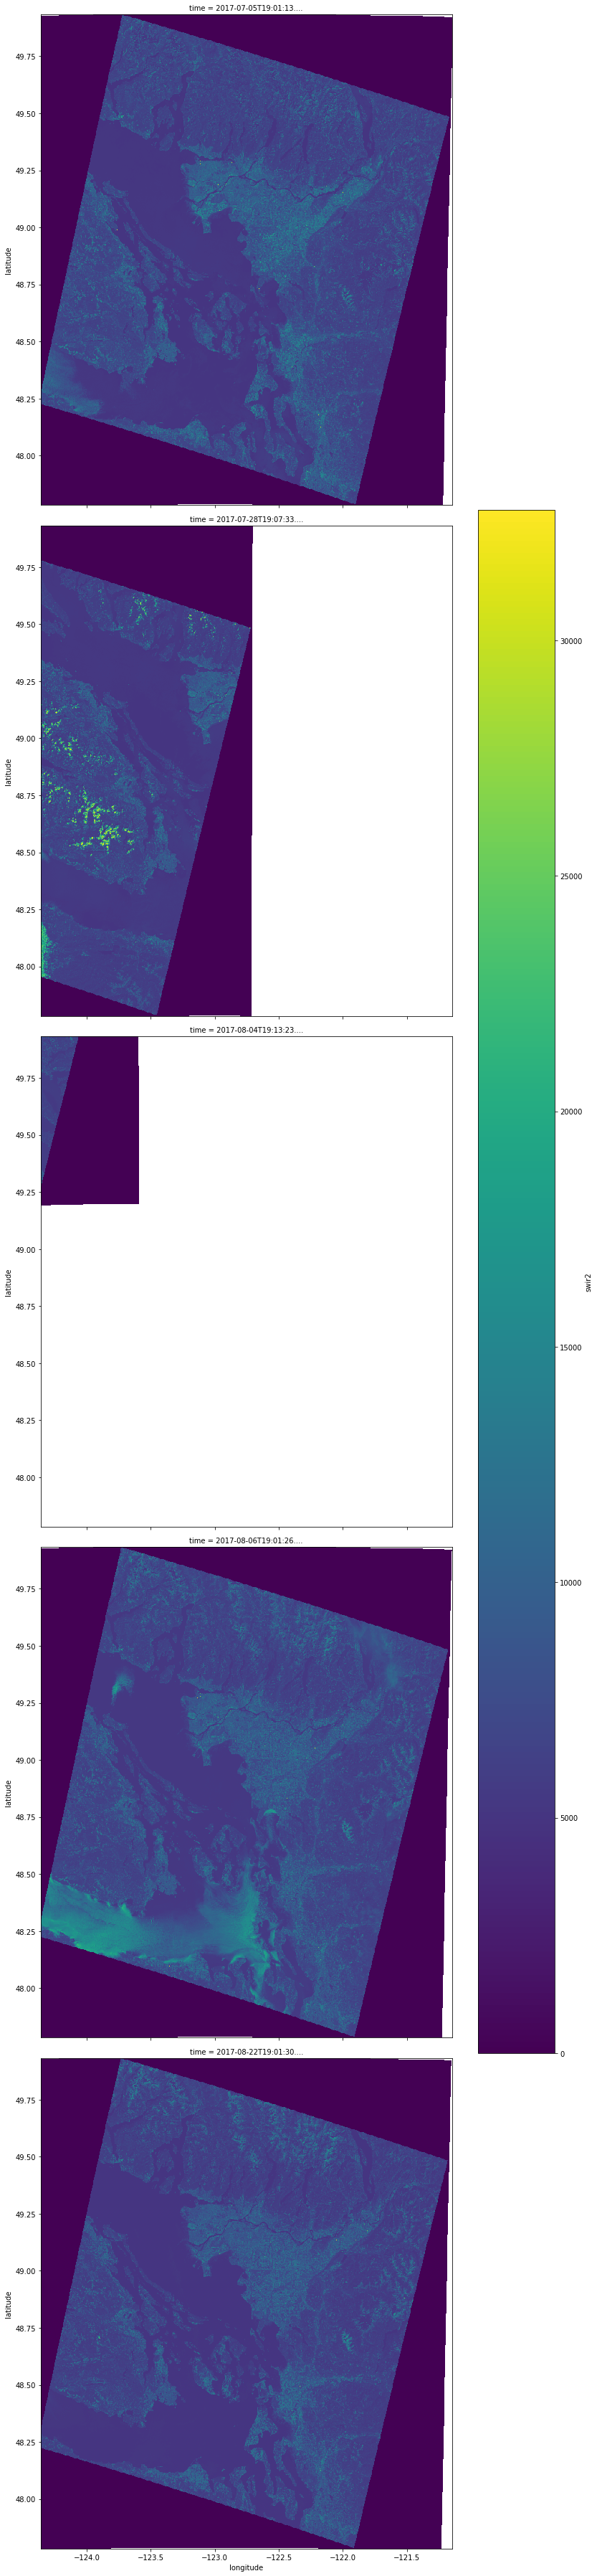

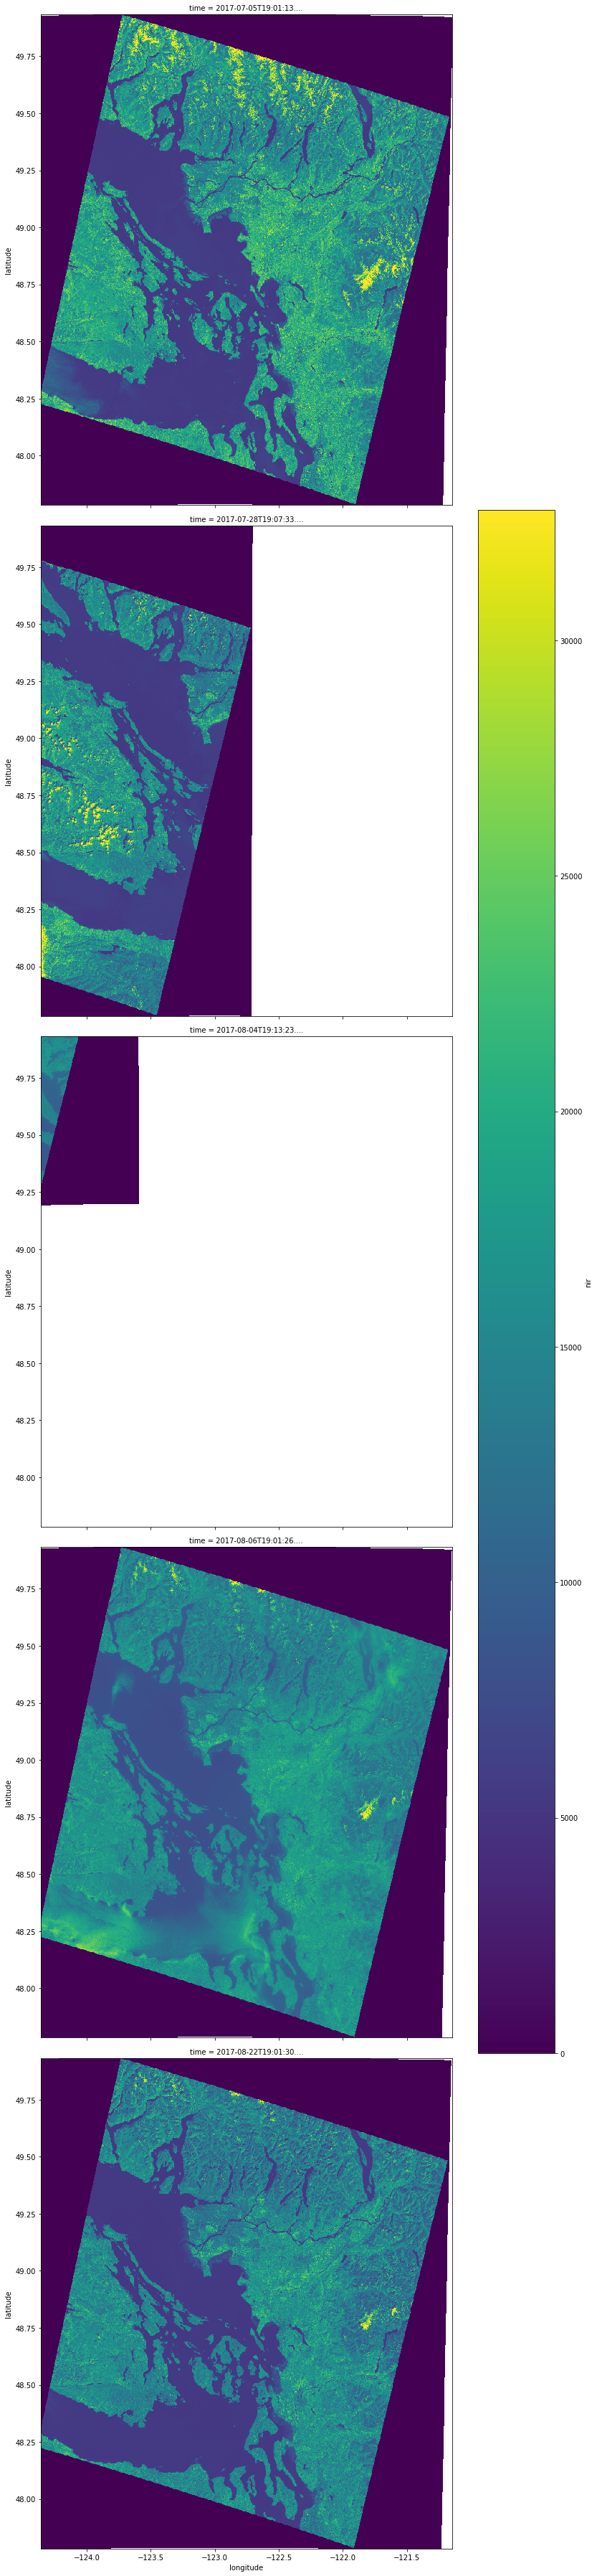

In [19]:
swir2.plot(col='time', col_wrap = 1, size = 10)
nir.plot(col='time', col_wrap = 1, size = 10)

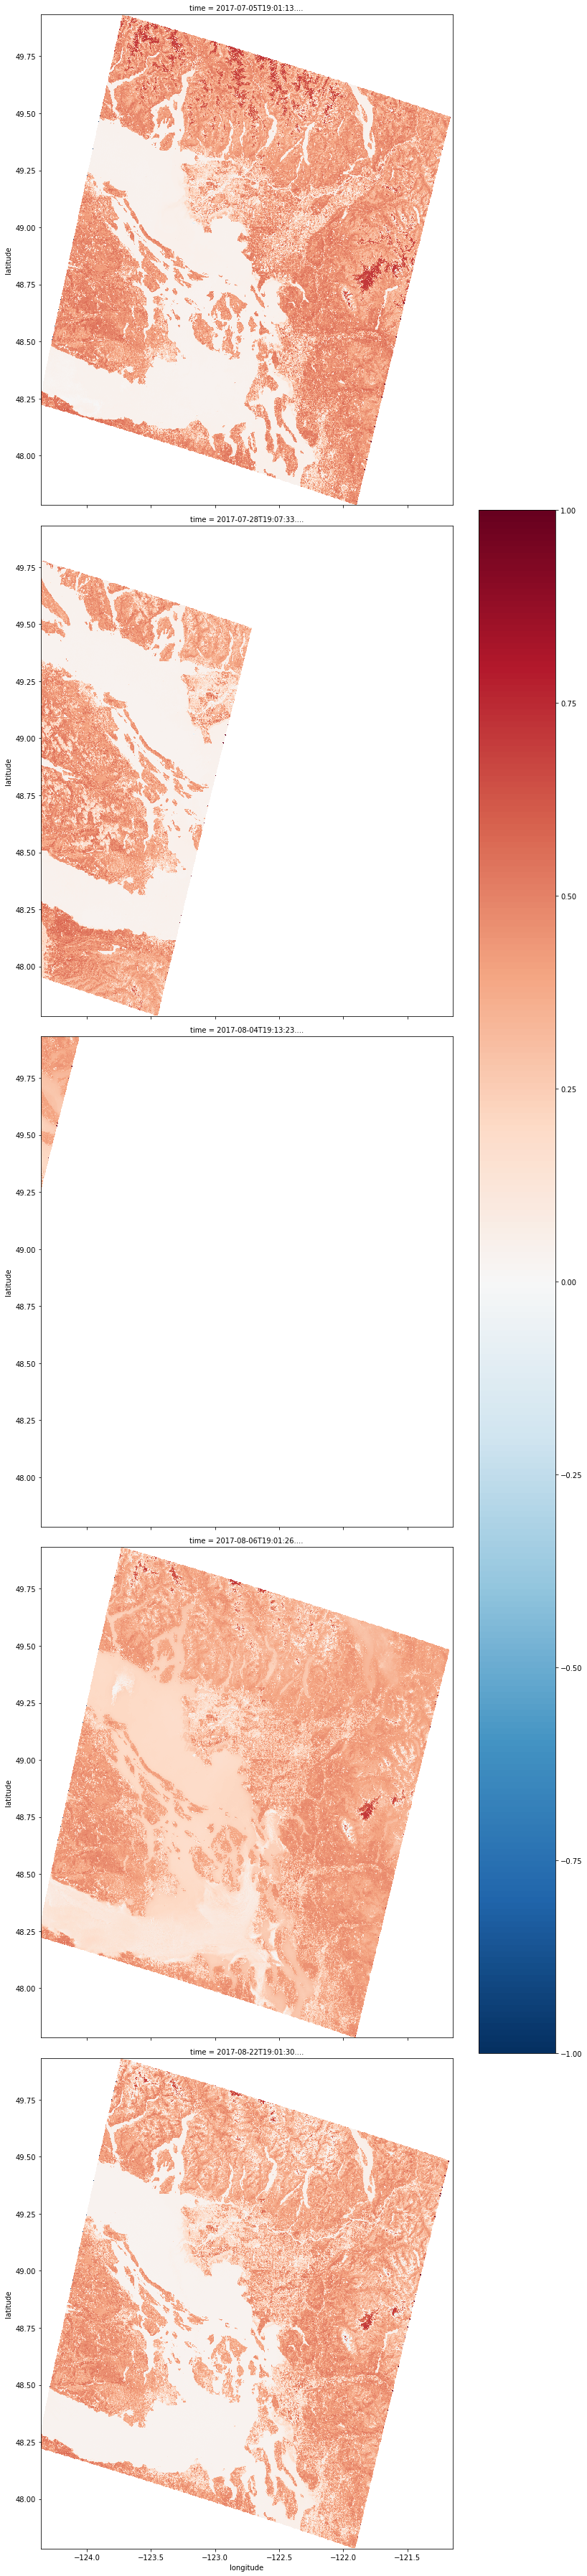

In [23]:
#Calculate and plot the NDBI
NDBI = ((nir - swir2) / (nir + swir2))
NDBI.plot(col='time', col_wrap = 1, size = 10)

In [24]:
# Isolate all valid data in the the two bands of interest
cloud_free = masking.make_mask(data, cloud=False, cirrus_confidence='Low', cloud_shadow_conf='Low').quality

AttributeError: 'FacetGrid' object has no attribute 'where'

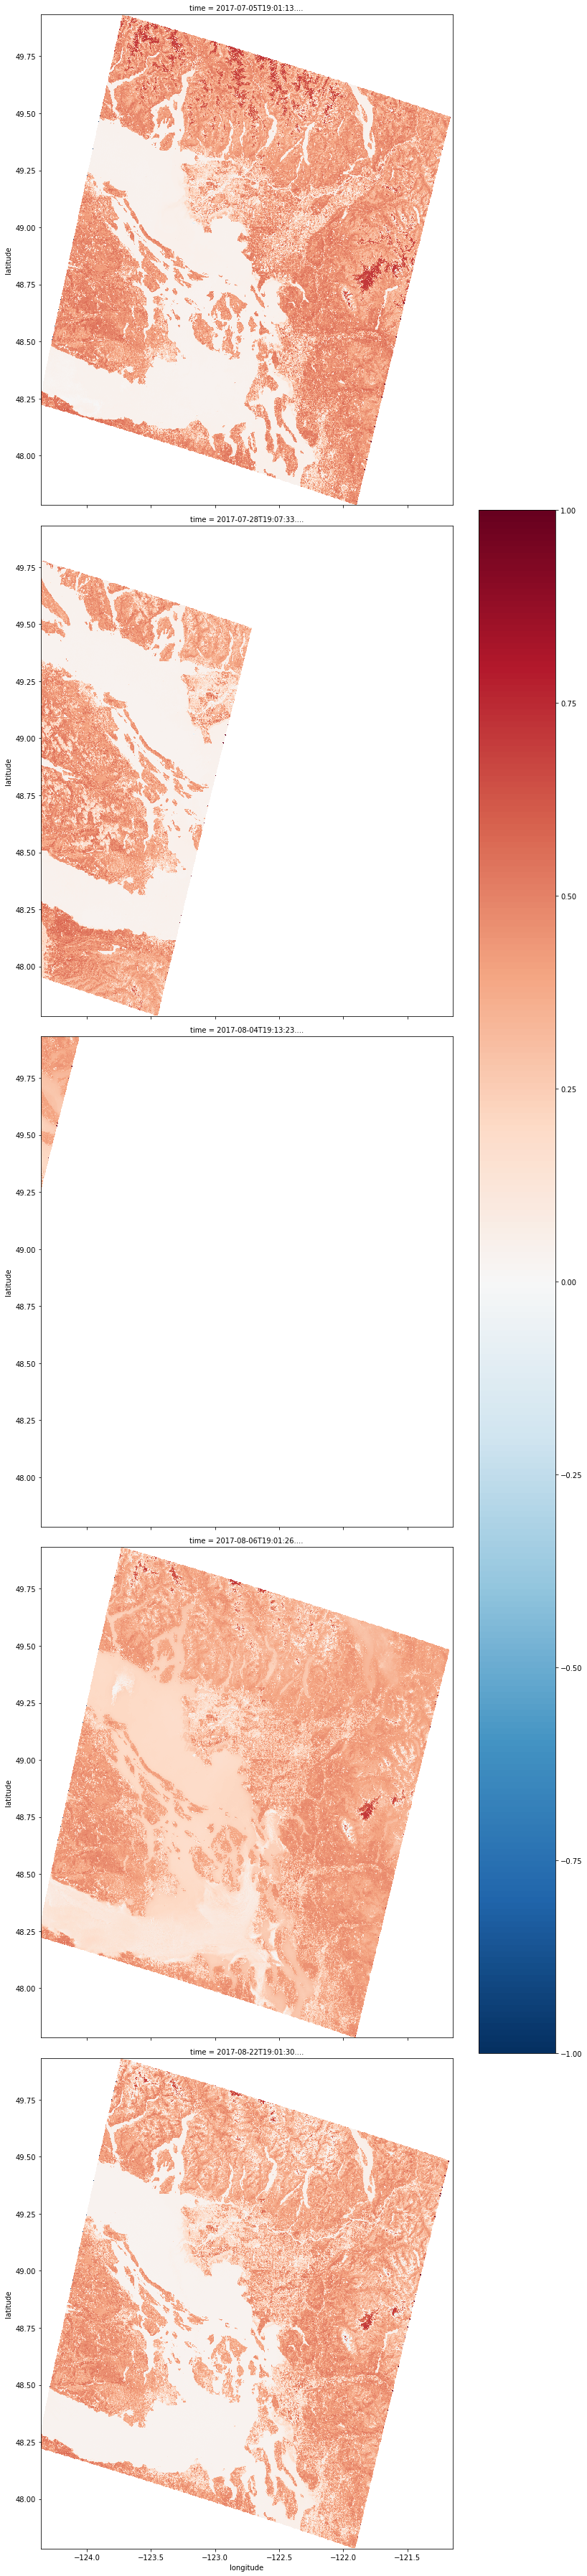

In [22]:
NDBI = ((nir - swir2) / (nir + swir2)).where(cloud_free)

NDBI.plot(col='time', col_wrap = 1, size = 10).where(cloud_free)